<a href="https://colab.research.google.com/github/nazirumar/CNN-Projects-Deep-Learning/blob/main/FingerPrint_SOCO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import os
import random
import itertools
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, MaxPooling2D, Dense,Dropout, Flatten
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical, plot_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import cv2 as cv
import matplotlib.pyplot as plt


LOAD DATASET AND UNZIF IT 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [128]:
LabelNames = ['LeftThumn','RightIndexFinger','RightMiddleFinger','LeftRingFinger', 'RightLittleFinger' ]
LabelNames[1]

'RightIndexFinger'

In [24]:
def extract_label(img_path,train = True):
    filename, _ = os.path.splitext(os.path.basename(img_path))

    if train:
       _, finger = filename.split('_')
    else:
       _, finger = filename.split('_')

    if finger == 'LeftThumb':
        finger = 0
    elif finger == 'RightIndexFinger':
        finger = 1
    elif finger == 'RightMiddleFinger':
        finger = 2
    elif finger == 'LeftRingFinger':
        finger = 3
    elif finger == 'RightLittleFinger':
        finger = 4
    return np.array([finger], dtype=np.uint16)
img_size = 96

data = []

def loading_data(path,train):
    print("loading data from: ",path)
  
    for img in os.listdir(path):
     
        try:
            img_array = cv.imread(os.path.join(path, img), cv.IMREAD_GRAYSCALE)
            img_resize = cv.resize(img_array, (img_size, img_size))
            label = extract_label(os.path.join(path, img),train)
            data.append([label, img_resize ])
        except Exception as e:
            pass
            
    return data
  

print(data)

Real_path = "/content/drive/MyDrive/DeepLearning/Derm_SOCOFing/Real"
Easy_path = "/content/drive/MyDrive/DeepLearning/Derm_SOCOFing/Altered/Altered-Easy"
Medium_path = "/content/drive/MyDrive/DeepLearning/Derm_SOCOFing/Altered/Altered-Medium"
Hard_path = "/content/drive/MyDrive/DeepLearning/Derm_SOCOFing/Altered/Altered-Hard"

Easy_data = loading_data(Easy_path, train = True)
Medium_data = loading_data(Medium_path, train = True)
Hard_data = loading_data(Hard_path, train = True)
test = loading_data(Real_path, train = False)

data = np.concatenate([Easy_data, Medium_data, Hard_data], axis=0)

del Easy_data, Medium_data, Hard_data


import random
random.shuffle(data)
random.shuffle(test)
data[0]

[]
loading data from:  /content/drive/MyDrive/DeepLearning/Derm_SOCOFing/Altered/Altered-Easy
loading data from:  /content/drive/MyDrive/DeepLearning/Derm_SOCOFing/Altered/Altered-Medium
loading data from:  /content/drive/MyDrive/DeepLearning/Derm_SOCOFing/Altered/Altered-Hard
loading data from:  /content/drive/MyDrive/DeepLearning/Derm_SOCOFing/Real


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


array([array([3], dtype=uint16),
       array([[255, 255, 255, ..., 255, 255, 255],
              [255, 255, 255, ..., 255, 255, 255],
              [255, 255, 255, ..., 255, 255, 255],
              ...,
              [255, 255, 255, ..., 255, 255, 255],
              [255, 255, 255, ..., 255, 255, 255],
              [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)],
      dtype=object)

In [115]:
data[0]

array([array([3], dtype=uint16),
       array([[255, 255, 255, ..., 255, 255, 255],
              [255, 255, 255, ..., 255, 255, 255],
              [255, 255, 255, ..., 255, 255, 255],
              ...,
              [255, 255, 255, ..., 255, 255, 255],
              [255, 255, 255, ..., 255, 255, 255],
              [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)],
      dtype=object)

Extract Images Label

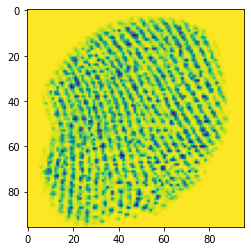

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(data[0][1])

In [26]:
X, y = [],[]

for label, feature in data:
    y.append(label)
    X.append(feature)

 
X_train = np.array(X).reshape(-1,img_size,img_size,1)
X_train = X_train/255

y_train = np.array(y)

In [27]:
X_train.shape

(150, 96, 96, 1)

In [28]:
y_train = y_train.reshape(-1)
y_train.shape

(150,)

In [55]:
X_test,y_test = [],[]

for label, feature in test:
    y_test.append(label)
    X_test.append(feature)
    
X_test = np.array(X_test).reshape(-1,img_size,img_size,1)
X_test = X_test/255

y_test = np.array(y_test)
y_test = y_test.reshape(-1)
y_test.shape

(50,)

In [54]:
print("full data:  ",np.asarray(X).shape)
print("Train:      ",X_train.shape)
print("Test:       ",X_test.shape)

full data:   (150, 96, 96)
Train:       (150, 96, 96, 1)
Test:        (50, 96, 96, 1)


In [29]:
np.unique(y_train)

array([0, 1, 2, 3, 4], dtype=uint16)

In [12]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu', input_shape=(img_size, img_size, 1)))
model.add(MaxPool2D(strides=2))
model.add(Conv2D(filters=64, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPool2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        102464    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 30976)             0         
                                                                 
 dense (Dense)               (None, 256)               7

In [148]:
dot_img_file = '/tmp/model_1.png'

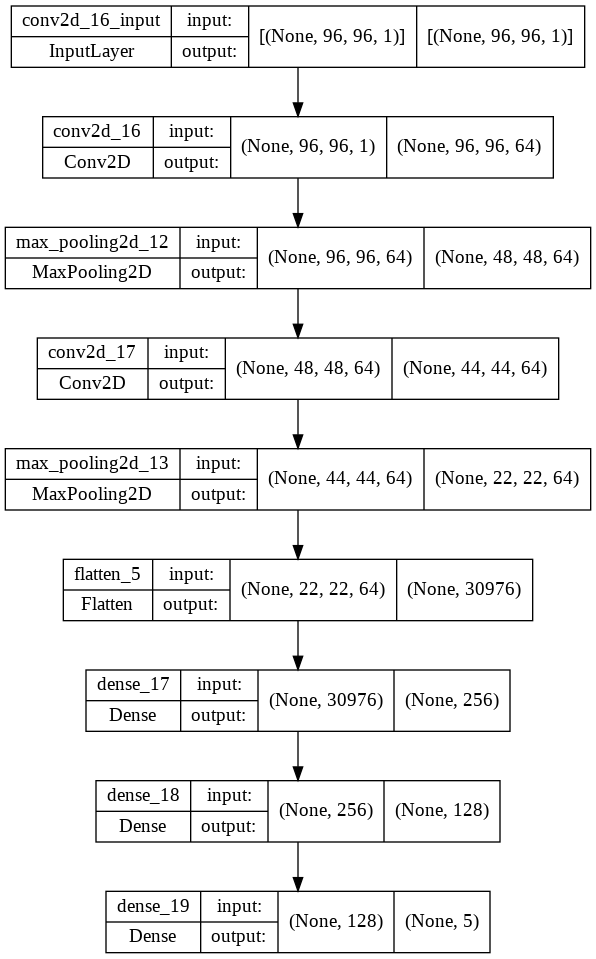

In [149]:
plot_model(model, to_file=dot_img_file, show_shapes=True)

In [150]:
model.compile(optimizer = optimizers.Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=15, epochs=30, validation_split=0.2)

Epoch 1/30
8/8 [==============================] - 8s 1s/step - loss: 1.6130 - accuracy: 0.2583 - val_loss: 1.6633 - val_accuracy: 0.1667
Epoch 2/30
8/8 [==============================] - 6s 704ms/step - loss: 1.5702 - accuracy: 0.3333 - val_loss: 1.6236 - val_accuracy: 0.2667
Epoch 3/30
8/8 [==============================] - 6s 714ms/step - loss: 1.5080 - accuracy: 0.5000 - val_loss: 1.5800 - val_accuracy: 0.4333
Epoch 4/30
8/8 [==============================] - 6s 709ms/step - loss: 1.4360 - accuracy: 0.5583 - val_loss: 1.4861 - val_accuracy: 0.4667
Epoch 5/30
8/8 [==============================] - 6s 711ms/step - loss: 1.3445 - accuracy: 0.4833 - val_loss: 1.4676 - val_accuracy: 0.3667
Epoch 6/30
8/8 [==============================] - 6s 713ms/step - loss: 1.2307 - accuracy: 0.6500 - val_loss: 1.3066 - val_accuracy: 0.5000
Epoch 7/30
8/8 [==============================] - 6s 706ms/step - loss: 1.1321 - accuracy: 0.7167 - val_loss: 1.1889 - val_accuracy: 0.6000
Epoch 8/30
8/8 [=======

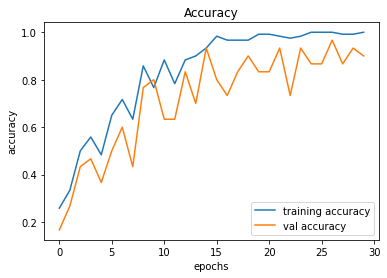

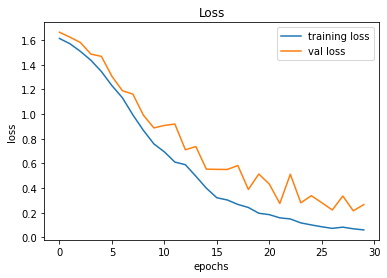

In [152]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title("Accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [155]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 1s 189ms/step - loss: 0.3946 - accuracy: 0.8800


[0.39457541704177856, 0.8799999952316284]

In [180]:
model.save('model_1.h5')

In [1]:
predictions = model.predict(X_test)
LabelNames[int(predictions[0].argmax(axis=0))]


NameError: ignored

In [193]:
# Model evaluation
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 88.00%


In [32]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten, BatchNormalization

In [33]:
model = Sequential()
#1st convlayer 
model.add(Conv2D(input_shape=(96,96,1),filters=64,kernel_size=(11,11),padding='same', activation='relu'))

#first layer has 96 filters 
#model.add(BatchNormalization())
#max Pooling
model.add(MaxPooling2D(pool_size=3, strides=2, padding='same'))

# 2nd conv layer 
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(BatchNormalization())

#max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd conv layer 
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
#model.add(BatchNormalization())

#4th conv layer 
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
#model.add(BatchNormalization())

#5th conv layer 
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
#max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model.add(BatchNormalization())



model.add(Flatten())
#1st fully connected layer has 4096
model.add(Dense(4096, input_shape=(96,96,1)))
model.add(BatchNormalization())
#Add dropout 
model.add(Dropout(0.5))

#2nd Fully connected layer 
model.add(Dense(4096))
model.add(BatchNormalization())
#Add dropout 
model.add(Dropout(0.5))

#passing it to a fully connected layer 


#3rd Fully Connected Layer
model.add(Dense(1000))
model.add(BatchNormalization())


#Output layer

model.add (layers.Dense(units=5, activation='softmax'))


model.summary()

#Compile the model 
#model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 96, 96, 64)        7808      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 48, 48, 256)       147712    
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 256)      1024      
 ormalization)                                                   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 256)      0         
 2D)                                                             
                                                      

In [34]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train,y_train, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
1/1 [==============================] - 41s 41s/step - loss: 1.9818 - accuracy: 0.2833 - val_loss: 1.6772 - val_accuracy: 0.2333
Epoch 2/10
1/1 [==============================] - 43s 43s/step - loss: 0.2798 - accuracy: 0.9583 - val_loss: 1.7015 - val_accuracy: 0.2333
Epoch 3/10
1/1 [==============================] - 31s 31s/step - loss: 0.0504 - accuracy: 0.9917 - val_loss: 1.6902 - val_accuracy: 0.2333
Epoch 4/10
1/1 [==============================] - 36s 36s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.6689 - val_accuracy: 0.2333
Epoch 5/10
1/1 [==============================] - 44s 44s/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.6515 - val_accuracy: 0.4667
Epoch 6/10
1/1 [==============================] - 36s 36s/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.6459 - val_accuracy: 0.2333
Epoch 7/10
1/1 [==============================] - 32s 32s/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 1.6540 - val_accuracy: 0.1667
Epoch 8/10
1/1 [===========

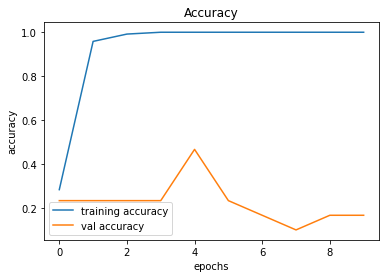

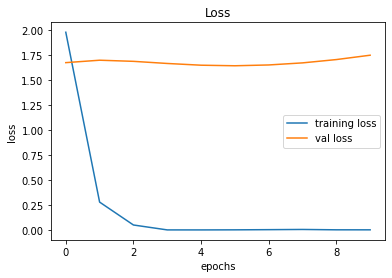

In [37]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title("Accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [38]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 3s 1s/step - loss: 1.5868 - accuracy: 0.2600


[1.5867724418640137, 0.25999999046325684]

In [39]:
predictions = model.predict(X_test)
predictions[:5]

array([[0.2007336 , 0.09695242, 0.2644055 , 0.09383789, 0.3440706 ],
       [0.246865  , 0.09965509, 0.23178677, 0.09074504, 0.33094814],
       [0.18664053, 0.09581384, 0.22895849, 0.08518643, 0.40340075],
       [0.2217482 , 0.10597705, 0.24090919, 0.09603368, 0.3353319 ],
       [0.17944568, 0.09281031, 0.21023476, 0.0862466 , 0.4312626 ]],
      dtype=float32)

In [40]:
predicted = [np.argmax(i) for i in predictions]
predicted[:5]

[4, 4, 4, 4, 4]

In [41]:
import tensorflow as tf
cm = tf.math.confusion_matrix(labels=y_test,predictions=predicted)

Text(33.0, 0.5, 'Truth')

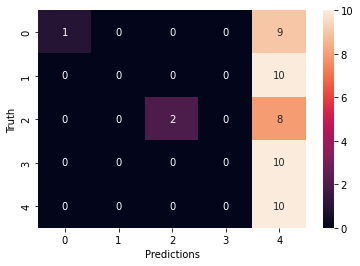

In [42]:
import seaborn as sn

sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predictions")
plt.ylabel("Truth")

In [70]:
model_3 = Sequential()

model_3.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (96,96,1)))
model_3.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model_3.add(MaxPool2D(pool_size=(2,2)))
model_3.add(Dropout(0.25))


model_3.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model_3.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model_3.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_3.add(Dropout(0.25))


model_3.add(Flatten())
model_3.add(Dense(100, activation = "relu"))
model_3.add(Dropout(0.5))
model_3.add(Dense(5, activation = "sigmoid"))

model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 96, 96, 32)        832       
                                                                 
 conv2d_20 (Conv2D)          (None, 96, 96, 32)        25632     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 48, 48, 32)       0         
 g2D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 48, 48, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 48, 48, 64)        18496     
                                                                 
 conv2d_22 (Conv2D)          (None, 48, 48, 64)        36928     
                                                      

In [71]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [74]:
epochs = 50 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 32
model_path = './Model_2.h5'


model_3.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    EarlyStopping(monitor='val_acc', patience=20, mode='max', verbose=1),
    ModelCheckpoint(model_path, monitor='val_acc', save_best_only=True, mode='max', verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1)
]


history = model_3.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, 
          validation_data = (X_test, y_test), verbose = 1, callbacks= callbacks)

Epoch 1/50
5/5 [==============================] - ETA: 0s - loss: 1.6380 - accuracy: 0.1800WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy
[WARNING] [2022-07-27 13:49:32,871:tensorflow] Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy
[WARNING] [2022-07-27 13:49:32,878:tensorflow] Can save best model only with val_acc available, skipping.
5/5 [==============================] - 16s 3s/step - loss: 1.6380 - accuracy: 0.1800 - val_loss: 1.6101 - val_accuracy: 0.2000 - lr: 1.0000e-04
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 1.6181 - accuracy: 0.2200WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy
[WARNING] [2022-07-27 13:49:45,941:tensorflow] Early stopping conditioned on metric `val_acc`

In [75]:
model_3.evaluate(X_test,y_test)


2/2 [==============================] - 1s 331ms/step - loss: 0.1144 - accuracy: 1.0000


[0.11441870033740997, 1.0]

In [116]:
nets = 2

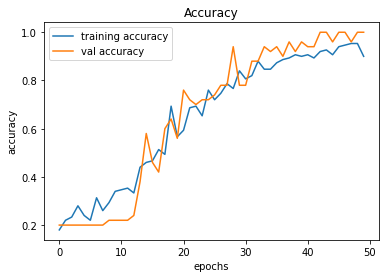

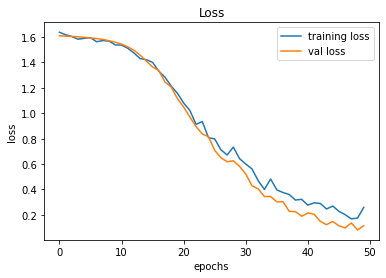

In [125]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title("Accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [90]:
model_3.save('model_3.h5')

In [98]:
len(X_test.shape)

4

In [129]:
from PIL import Image as im


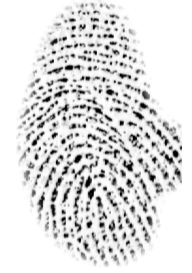

In [225]:
test_1 ='/content/drive/MyDrive/DeepLearning/Derm_SOCOFing/Real/00006_LeftRingFinger.png'
test_2 ='/content/drive/MyDrive/DeepLearning/Derm_SOCOFing/Real/00006_RightLittleFinger.png'
im.open(test_2)

In [222]:
from PIL import Image
import numpy as np
from skimage import transform
def load(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')/255
   np_image = transform.resize(np_image, (96, 96, 1))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

image = load(test_2)
prediction_3= model_3.predict(image)
LabelNames[int(prediction_3[0].argmax(axis=0))]

'RightLittleFinger'

In [181]:
prediction_3 = model_3.predict(X_test)
LabelNames[int(prediction_3[2].argmax(axis=0))]

'RightLittleFinger'

In [126]:
val_pred = np.argmax(model_3.predict(X_test), axis=-1)
val_pred

array([2, 0, 4, 3, 4, 1, 1, 3, 2, 1, 3, 3, 4, 4, 2, 4, 3, 3, 4, 1, 4, 4,
       3, 2, 3, 0, 2, 1, 4, 2, 1, 2, 2, 3, 0, 1, 0, 2, 1, 0, 2, 0, 4, 0,
       0, 1, 0, 3, 1, 0])